# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from config_Prince import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# testing to see if city names loop worked. 
# cit_name = pd.DataFrame(cities)
# cit_name.head()

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# creating empty lists to hold values from for loop with the try/except 
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
lat = []
long = []
cit_name = []

In [4]:
# for loop to fill empty lists above
for city_name in cities:
    
    url = "http://api.openweathermap.org/data/2.5/weather?" # openweather url
    units = "imperial" 
    # Create search query, make request and store in json
    query_url = f"{url}&units={units}&appid={api_key}&q="
    response = requests.get(query_url + city_name).json()
    
    # Try to grab the values in the json file and append them to the list
    try:
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        cit_name.append(response['name'])
        print(f"Processing... City Name is: {city_name}") # print message for varification purposes
        
    # Handle exceptions for 
    except:
        # print out where loop did not find a city
        print("City not found... Skipping")
        pass

Processing... City Name is: hermanus
Processing... City Name is: albany
Processing... City Name is: ponta do sol
Processing... City Name is: yellowknife
Processing... City Name is: airai
Processing... City Name is: haapiti
Processing... City Name is: punta arenas
Processing... City Name is: nikolskoye
Processing... City Name is: bangangte
Processing... City Name is: adrar
Processing... City Name is: butaritari
Processing... City Name is: provideniya
Processing... City Name is: bredasdorp
Processing... City Name is: moerai
Processing... City Name is: hobart
Processing... City Name is: port alfred
Processing... City Name is: sao filipe
Processing... City Name is: hilo
Processing... City Name is: kapaa
Processing... City Name is: tuatapere
Processing... City Name is: port elizabeth
Processing... City Name is: tuktoyaktuk
Processing... City Name is: traralgon
Processing... City Name is: new norfolk
Processing... City Name is: avarua
Processing... City Name is: cabanas
Processing... City Na

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# put all the captured values from the loop into a usable dataframe
City_data = pd.DataFrame({
    'City': cit_name,
    'lat': lat,
    'Lng': long,
    'Max Temp': Max_Temp,
    'Humidity': Humidity,
    'Cloudiness': Cloudiness,
    'Wind Speed': Wind_Speed,
    'Country': Country,
    'Date': Date
})
City_data.head() # display a portion of the new dataframe

,City,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,59.00,73,37,7.00,ZA,1619910621
1,Albany,42.6001,-73.9662,53.01,37,40,9.22,US,1619910350
2,Ponta do Sol,32.6667,-17.1000,57.99,65,90,1.99,PT,1619910444
3,Yellowknife,62.4560,-114.3525,34.00,51,20,9.22,CA,1619910621
4,Airai,-8.9266,125.4092,60.85,81,81,3.51,TL,1619910622


In [6]:
# Export the data to Resources folder and name the file 'City_Data.csv'
City_data.to_csv('..\Resources\City_Data.csv',index=False)

In [7]:
# a brief description of the data 
City_data.describe()

,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,19.527796,16.349370,60.756866,71.094203,54.688406,7.606848,1.619911e+09
std,34.167887,90.032692,19.113232,21.967601,38.111128,5.639326,1.148713e+02
min,-54.800000,-179.166700,13.100000,4.000000,0.000000,0.310000,1.619910e+09
25%,-11.330125,-62.453475,44.900000,61.750000,20.000000,3.525000,1.619911e+09
50%,22.384400,20.510400,64.185000,75.000000,61.500000,5.860000,1.619911e+09
75%,50.116750,92.350050,77.000000,88.000000,91.000000,10.360000,1.619911e+09
max,78.218600,179.316700,94.800000,100.000000,100.000000,39.120000,1.619911e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
hum_100 = City_data[City_data['Humidity'] > 100]
index = hum_100.index
index

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# apply filter to data - this is to see if there are any cities with 100%+ humidity and keep only cities below
clean_city_data = City_data[City_data['Humidity'] < 100] 
clean_city_data.head()

,City,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,59.00,73,37,7.00,ZA,1619910621
1,Albany,42.6001,-73.9662,53.01,37,40,9.22,US,1619910350
2,Ponta do Sol,32.6667,-17.1000,57.99,65,90,1.99,PT,1619910444
3,Yellowknife,62.4560,-114.3525,34.00,51,20,9.22,CA,1619910621
4,Airai,-8.9266,125.4092,60.85,81,81,3.51,TL,1619910622


The above table is the final cleaned up version of the original city_data captured through the for loop. 

What comes next is plotting to see where correlation exist

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

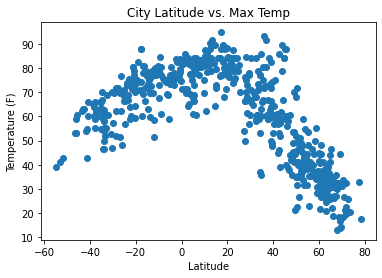

In [15]:
# isolate latitude and Max Temp for plot purposes
lat_temp = clean_city_data[['lat','Max Temp']]

# scatter plot
plt.scatter(lat_temp['lat'],lat_temp['Max Temp'])

# labels for plot
plt.title("City Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("../images/City Latitde vs Max Temperature.png")

In the above 1st plot, the plots shows how temperature tends to behave depending on how close or far away one gets to the equator. 

Max temperatures are very high around the equator. The further you get away, however, temperatur drops fast. 

## Latitude vs. Humidity Plot

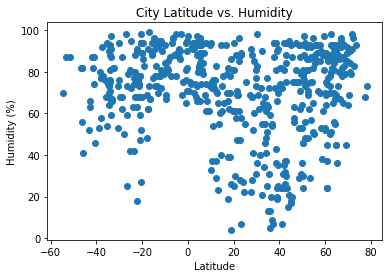

In [16]:
lat_Hum = clean_city_data[['lat','Humidity']]

# scatter plot
plt.scatter(lat_Hum['lat'],lat_Hum['Humidity'])

# labels for plot
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../images/City Latitde vs Humidity.png")

The behavior of humidity as one gets far or close to the equator is not quite easy to determine, as the above scatter plot shows. The correlation is not very upfront.

There are high and low humidity all throughout. Although, VERY close to the equator, the scatter plot shows where humidity tend to be always high. There doesn't appear to be any low humidity points around the equator. 

## Latitude vs. Cloudiness Plot

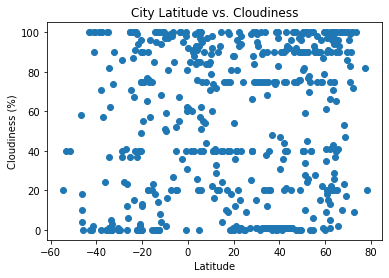

In [17]:
lat_cloud = clean_city_data[['lat','Cloudiness']]

# scatter plot
plt.scatter(lat_cloud['lat'],lat_cloud['Cloudiness'])

# labels for plot
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../images/City Latitde vs Cloudiness.png")

The above scatter plot does not show much of a correlation between latitude and cloudiness. The most apparent from the plot there are some densly cloudy areas MUCH above the equator at the time this data was captured. 

## Latitude vs. Wind Speed Plot

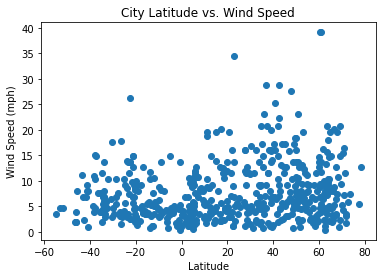

In [18]:
lat_wind = clean_city_data[['lat','Wind Speed']]

# scatter plot
plt.scatter(lat_wind['lat'],lat_wind['Wind Speed'])

# labels for plot
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../images/City Latitde vs Wind Speed.png")

Wind speeds, according to the scatter plot above, are relatively low regardless of how close one gets to the equator.

## Linear Regression

In [ ]:
# City_data[City_data['Humidity'] > 100]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-valued is: 0.7321255347360719


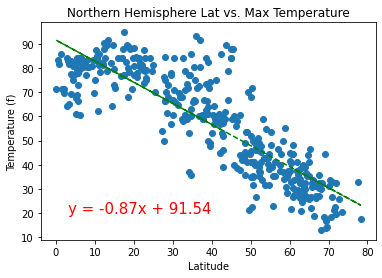

In [34]:
# filtering the Latitute/Max temp data for where Lat is greater than or equal to 0
north_temp = lat_temp[lat_temp['lat'] >= 0]

# calculate linear regression
data_regress_NT = linregress(north_temp.iloc[:,0],north_temp.iloc[:,1])

# unpack the regression 
(slope, intercept, rvalue, pvalue, stderr) = data_regress_NT

# using the regression formula (y = mx + b) pass the unpacked values into a variable
reg_value_NT = north_temp.iloc[:,0]*slope + intercept
equation_NT = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(equation_NT)

# Plotting
plt.plot(north_temp.iloc[:,0],reg_value_NT,color='green', linestyle='dashed')
plt.scatter(north_temp['lat'],north_temp['Max Temp']) # scatter plot
plt.annotate(equation_NT,(3,20),fontsize=15,color="red")

# labels for plot
plt.title("Northern Hemisphere Lat vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (f)")
print(f"The r-valued is: {rvalue**2}")
plt.savefig("../images/Northern Hemisphere Lat vs. Max Temperature.png")
plt.show()


In the above plot and value, the r-squared value (0.73) indicates that about 73% of the variability in the data centers around the mean. What this means is that one can tell how well the linear model fit the observation about max temperate behavior when one moves away from the equator. I previously stated that maximum temperature tends to drop when one moves away from the equator. The regression line in the scatter plot shows the linearity of that relationship. Additionaly, the r-squared value fortifies this relationship. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-valued is: 0.5134284746082607


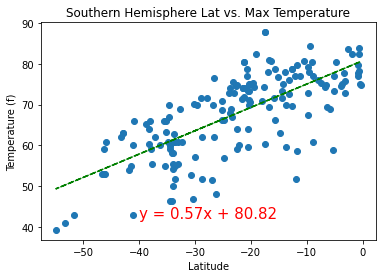

In [36]:
# filtering the Latitute/Max temp data for where Lat is less than 0
south_temp = lat_temp[lat_temp['lat'] < 0]

# calculate linear regression
data_regress_ST = linregress(south_temp.iloc[:,0],south_temp.iloc[:,1])

# unpack the regression 
(slope, intercept, rvalue, pvalue, stderr) = data_regress_ST

# using the regression formula (y = mx + b) pass the unpacked values into a variable
reg_value_ST = south_temp.iloc[:,0]*slope + intercept
equation_ST = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(equation_ST)

# Plotting
plt.plot(south_temp.iloc[:,0],reg_value_ST,color='green', linestyle='dashed')
plt.scatter(south_temp['lat'],south_temp['Max Temp']) # scatter plot
plt.annotate(equation_ST,(-40,42),fontsize=15,color="red")

# labels for plot
plt.title("Southern Hemisphere Lat vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (f)")
print(f"The r-valued is: {rvalue**2}")


plt.savefig("../images/Southern Hemisphere Lat vs. Max Temperature.png")
plt.show()

In the above plot and value, the r-squared value (0.51) indicates that about 51% of the variability in the data centers around the mean. The linearity of this data does not fit our observation as well as it did in the northern hemisphere scatter plot. However, there is still some linearity seen in the plot. This can be due to the fact that the random number generator used to select latitudes favored more northern hemisphere data points than it did for the southern hemisphere. Regardless, there is still a correlation of max temperature being relatively low the further one gets away from the equator. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-valued is: 0.002932716817409596


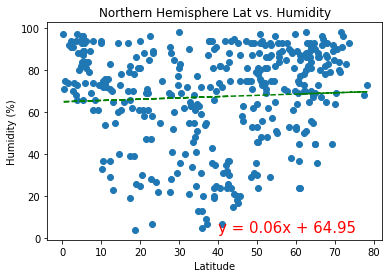

In [37]:
# filtering the Latitute/Humidity data for where Lat is greater than or equal to 0
north_hum = lat_Hum[lat_Hum['lat'] >= 0]

# calculate linear regression
data_regress_NH = linregress(north_hum.iloc[:,0],north_hum.iloc[:,1])

# unpack the regression 
(slope, intercept, rvalue, pvalue, stderr) = data_regress_NH

# using the regression formula (y = mx + b) pass the unpacked values into a variable
reg_value_NH = north_hum.iloc[:,0]*slope + intercept
equation_NH = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(equation_NH)

# Plotting
plt.plot(north_hum.iloc[:,0],reg_value_NH,color='green', linestyle='dashed')
plt.scatter(north_hum['lat'],north_hum['Humidity']) # scatter plot
plt.annotate(equation_NH,(40,3),fontsize=15,color="red")

# labels for plot
plt.title("Northern Hemisphere Lat vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-valued is: {rvalue**2}")
plt.savefig("../images/Northern Hemisphere Lat vs. Humidity.png")
plt.show()

In the above plot, the r-squared value (0.029) indicates that about 2.9% of the variability in the data centers around the mean. As I stated previously, there is not much of a relationship between humidity and latitude change. Only 2% of the data centers around the mean, and the slope of the line is not linear enough to explain a good correlation. The regression line in the scatter plot shows the absence of linearity. Additionaly, the r-squared value does not fortifies this relationship.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-valued is: 0.06555669595099045


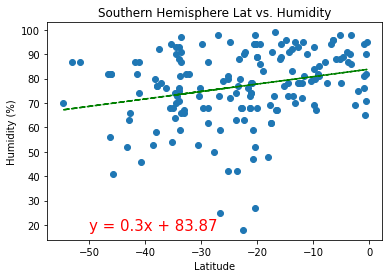

In [38]:
# filtering the Latitute/Humidity data for where Lat is less than 0
south_hum = lat_Hum[lat_Hum['lat'] < 0]

# calculate linear regression
data_regress_SH = linregress(south_hum.iloc[:,0],south_hum.iloc[:,1])

# unpack the regression 
(slope, intercept, rvalue, pvalue, stderr) = data_regress_SH

# using the regression formula (y = mx + b) pass the unpacked values into a variable
reg_value_SH = south_hum.iloc[:,0]*slope + intercept
equation_SH = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(equation_SH)

# Plotting
plt.plot(south_hum.iloc[:,0],reg_value_SH,color='green', linestyle='dashed')
plt.scatter(south_hum['lat'],south_hum['Humidity']) # scatter plot
plt.annotate(equation_SH,(-50,18),fontsize=15,color="red")

# labels for plot
plt.title("Southern Hemisphere Lat vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-valued is: {rvalue**2}")

plt.savefig("../images/Southern Hemisphere Lat vs. Humidity.png")
plt.show()

Observations of Southern hemisphere humidity scatter plot is relatively similar to that of the north. The regression line is less linear than the north; further proving that there is no positive/negative relationship between humidity and change in latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-valued is: 0.005825393597866237


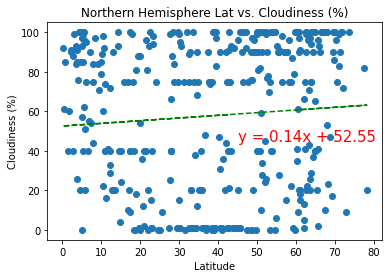

In [39]:
# filtering the Latitute/Cloudiness data for where Lat is greater than or equal to 0
north_cloud = lat_cloud[lat_cloud['lat'] >= 0]

# calculate linear regression
data_regress_NC = linregress(north_cloud.iloc[:,0],north_cloud.iloc[:,1])

# unpack the regression 
(slope, intercept, rvalue, pvalue, stderr) = data_regress_NC

# using the regression formula (y = mx + b) pass the unpacked values into a variable
reg_value_NC = north_cloud.iloc[:,0]*slope + intercept
equation_NC = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(equation_NH)

# Plotting
plt.plot(north_cloud.iloc[:,0],reg_value_NC,color='green', linestyle='dashed')
plt.scatter(north_cloud['lat'],north_cloud['Cloudiness']) # scatter plot
plt.annotate(equation_NC,(45,45),fontsize=15,color="red")

# labels for plot
plt.title("Northern Hemisphere Lat vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-valued is: {rvalue**2}")

plt.savefig("../images/Northern Hemisphere Lat vs. Cloudiness (%).png")

plt.show()

Similar to humidity, cloudines does not appear to be affected by change in latitude. Slope of the regresion line is relatively flat. Furthermore, only about 2% (r-squared value of 0.018) of the data centers around the mean. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-valued is: 0.051220481915683035


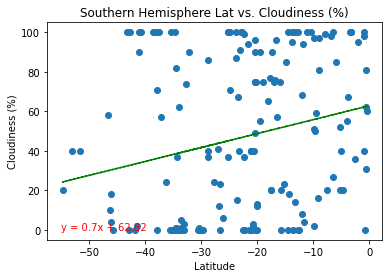

In [40]:
# filtering the Latitute/Cloudiness data for where Lat is less than 0
south_cloud = lat_cloud[lat_cloud['lat'] < 0]

# calculate linear regression
data_regress_SC = linregress(south_cloud.iloc[:,0],south_cloud.iloc[:,1])

# unpack the regression 
(slope, intercept, rvalue, pvalue, stderr) = data_regress_SC

# using the regression formula (y = mx + b) pass the unpacked values into a variable
reg_value_SC = south_cloud.iloc[:,0]*slope + intercept
equation_SC = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(equation_NH)

# Plotting
plt.plot(south_cloud.iloc[:,0],reg_value_SC,color='green', linestyle='dashed')
plt.scatter(south_cloud['lat'],south_cloud['Cloudiness']) # scatter plot
plt.annotate(equation_SC,(-55,0),fontsize=10,color="red")

# labels for plot
plt.title("Southern Hemisphere Lat vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-valued is: {rvalue**2}")

plt.savefig("../images/Southern Hemisphere Lat vs. Cloudiness (%).png")
plt.show()

Again, cloudines does not appear to be affected by change in latitude. Only about 5% (r-squared value of 0.051) of the data centers around the mean. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-valued is: 0.01612278884181325


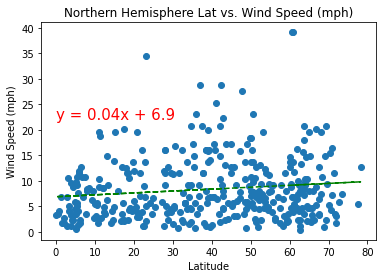

In [41]:
# filtering the Latitute/Wind Speed data for where Lat is greater than or equal to 0
north_wind = lat_wind[lat_wind['lat'] >= 0]

# calculate linear regression
data_regress_NW = linregress(north_wind.iloc[:,0],north_wind.iloc[:,1])

# unpack the regression 
(slope, intercept, rvalue, pvalue, stderr) = data_regress_NW

# using the regression formula (y = mx + b) pass the unpacked values into a variable
reg_value_NW = north_wind.iloc[:,0]*slope + intercept
equation_NW = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(equation_NH)

# Plotting
plt.plot(north_wind.iloc[:,0],reg_value_NW,color='green', linestyle='dashed')
plt.scatter(north_wind['lat'],north_wind['Wind Speed']) # scatter plot
plt.annotate(equation_NW,(0,22),fontsize=15,color="red")

# labels for plot
plt.title("Northern Hemisphere Lat vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-valued is: {rvalue**2}")

plt.savefig("../images/Northern Hemisphere Lat vs. Wind Speed (mph).png")
plt.show()

In the above plot, we see that there is little to no relationship between windspeed and change in latitude. R-squared also fortifies this observation

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-valued is: 0.017146581215053525


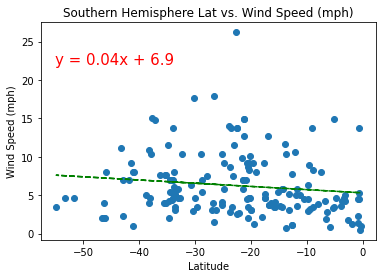

In [42]:
# filtering the Latitute/Wind Speed data for where Lat is less than 0
south_wind = lat_wind[lat_wind['lat'] < 0]

# calculate linear regression
data_regress_SW = linregress(south_wind.iloc[:,0],south_wind.iloc[:,1])

# unpack the regression 
(slope, intercept, rvalue, pvalue, stderr) = data_regress_SW

# using the regression formula (y = mx + b) pass the unpacked values into a variable
reg_value_SW = south_wind.iloc[:,0]*slope + intercept
equation_SW = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(equation_NH)

# Plotting
plt.plot(south_wind.iloc[:,0],reg_value_SW,color='green', linestyle='dashed')
plt.scatter(south_wind['lat'],south_wind['Wind Speed']) # scatter plot
plt.annotate(equation_NW,(-55,22),fontsize=15,color="red")

# labels for plot
plt.title("Southern Hemisphere Lat vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-valued is: {rvalue**2}")

plt.savefig("../images/Southern Hemisphere Lat vs. Wind Speed (mph).png")
plt.show()

In the above plot, we see that there is little to no relationship between windspeed and change in latitude. R-squared also fortifies this observation